<a href="https://colab.research.google.com/github/DunkleCat/ia-mushrooms/blob/master/mushroom_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerie

In [0]:
# Generici
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

# Classificatori
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Rete neurale
import tensorflow as tf

# Rende i numeri a virgola mobile più leggibili
np.set_printoptions(precision=3, suppress=True)

# Dataframe

## Download del dataframe

In [0]:
csv_file = "./mushroom_data_all.csv"
dataframe = pd.read_csv(csv_file)
target_label = "class_edible"

## Ottimizzazione del dataframe

La rete neurale lavora sfruttando i numeri e non le stringhe. Per questo motivo conviene trasformare ogni colonna che contiene elementi scritti come caratteri o stringhe (in questo caso tutti) in numeri interi che rappresentino l'elemento corrispondente. 

In [3]:
print("Before:\n", dataframe.head())

for elem in dataframe:
  dataframe[elem] = pd.Categorical(dataframe[elem])
  dataframe[elem] = getattr(dataframe, elem).cat.codes

print("\nAfter:\n", dataframe.head())

Before:
   class_edible cap-shape cap-surface  ... spore-print-color population habitat
0            p         x           s  ...                 k          s       u
1            e         x           s  ...                 n          n       g
2            e         b           s  ...                 n          n       m
3            p         x           y  ...                 k          s       u
4            e         x           s  ...                 n          a       g

[5 rows x 23 columns]

After:
    class_edible  cap-shape  cap-surface  ...  spore-print-color  population  habitat
0             1          5            2  ...                  2           3        5
1             0          5            2  ...                  3           2        1
2             0          0            2  ...                  3           2        3
3             1          5            3  ...                  2           3        5
4             0          5            2  ...                

# Classificatori

## Preparazione del classificatore

In [4]:
train, test = train_test_split(dataframe, test_size=0.1)
print(len(train), 'train examples')
print(len(test), 'test examples')

model_rf = RandomForestClassifier(random_state=1)
model_dt = DecisionTreeClassifier(random_state=1)

7311 train examples
813 test examples


## Addestramento

In [0]:
train_target = train.pop(target_label)
model_rf.fit(train, train_target)
model_dt.fit(train, train_target)

## Test

In [6]:
test_target = test.pop(target_label)

preds = model_rf.predict(test)
test_accuracy = metrics.accuracy_score(test_target, preds)
print('[Random Forest]: Accuratezza Fase di Test: ', test_accuracy)

preds = model_dt.predict(test)
test_accuracy = metrics.accuracy_score(test_target, preds)
print('[Decision Tree]: Accuratezza Fase di Test: ', test_accuracy)

[Random Forest]: Accuratezza Fase di Test:  1.0
[Decision Tree]: Accuratezza Fase di Test:  1.0


# Rete neurale

## Preparazione del modello

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'])


## Preparazione dei dataframe di Addestramento, Test e Valutazione

In [8]:
train, test = train_test_split(dataframe, test_size=0.2)
train, val = train_test_split(train, test_size=0.1)
print(len(train), 'train examples')
print(len(test), 'test examples')
print(len(val), 'val example')

5849 train examples
1625 test examples
650 val example


## Addestramento

In [0]:
# Creazione del dataset tensorflow di training
train_target = train.pop(target_label)
train_dataset = (tf.data.Dataset.from_tensor_slices((train.values, train_target.values))).shuffle(len(train)).batch(1)

# Fase di Training
history = model.fit(train_dataset, epochs=30, use_multiprocessing=True)

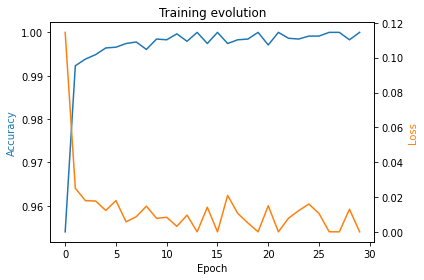

In [10]:
  plt.title('Training evolution')
  plt.xlabel('Epoch')

  color = 'tab:blue'
  plt.plot(history.history['accuracy'], color=color)
  plt.ylabel('Accuracy', color=color)

  plt.twinx()

  color = 'tab:orange'
  plt.plot(history.history['loss'], color=color)
  plt.ylabel('Loss', color=color)

  plt.tight_layout()
  plt.show()

## Test

In [11]:
# Creazione del dataset di test 
test_target = test.pop(target_label)
test_dataset = (tf.data.Dataset.from_tensor_slices((test.values, test_target.values))).shuffle(len(test)).batch(1)

# Fase di test
test_loss, test_accuracy = model.evaluate(test_dataset)
print('\n\nTest Loss {}, Test Accuracy {}'.format(test_loss, test_accuracy))

1625/1625 [==============================] - 2s 1ms/step - loss: 1.1465e-05 - accuracy: 1.0000


Test Loss 1.146490376413567e-05, Test Accuracy 1.0


## Valutazione

In [12]:
# Creazione del dataset di valutazione
val_target = val.pop(target_label)
val_dataset = (tf.data.Dataset.from_tensor_slices(val.values)).batch(1)

# Fase di valutazione
predictions = model.predict(val_dataset)

# TODO grafico dei risultati attesi/ottenuti
# Presentazione dei risultati di valutazione
for prediction, poisonous in zip(predictions[:10], list(val_target)[:10]):
  prediction = tf.sigmoid(prediction).numpy()
  print("Predicted poisonous: {:.2%}".format(prediction[0]),
        " | Actual outcome: ",
        ("Poisonous" if bool(poisonous) else "Safe"))


Predicted poisonous: 0.00%  | Actual outcome:  Safe
Predicted poisonous: 100.00%  | Actual outcome:  Poisonous
Predicted poisonous: 0.00%  | Actual outcome:  Safe
Predicted poisonous: 100.00%  | Actual outcome:  Poisonous
Predicted poisonous: 100.00%  | Actual outcome:  Poisonous
Predicted poisonous: 100.00%  | Actual outcome:  Poisonous
Predicted poisonous: 100.00%  | Actual outcome:  Poisonous
Predicted poisonous: 0.00%  | Actual outcome:  Safe
Predicted poisonous: 0.00%  | Actual outcome:  Safe
Predicted poisonous: 0.00%  | Actual outcome:  Safe
